In [12]:
import numpy as np
from numpy import log10
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from pywt import wavedec
from pywt import waverec
from sklearn.metrics import mean_squared_error

In [13]:
# Load the EEG signal dataset from a CSV file
eeg_data = pd.read_csv('eeg_data.csv')

In [14]:
signal = eeg_data['EEG.AF3'].values

Text(0.5, 1.0, 'Original Signal')

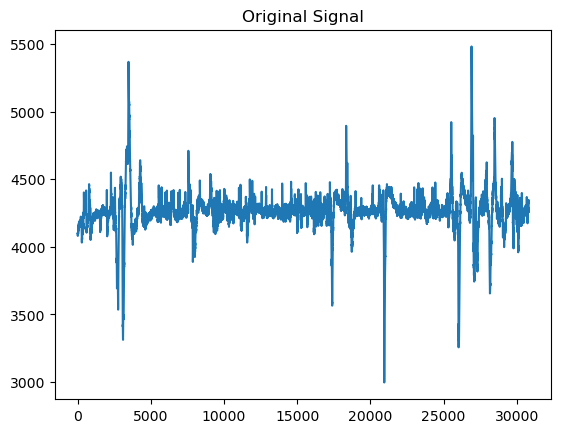

In [15]:
# Plot the noisy signal
plt.figure()
plt.plot(signal)
plt.title('Original Signal')

In [16]:
# Add Poisson noise to the signal
lambda_ = 5  # parameter of the Poisson distribution
noisy_signal = np.random.poisson(lambda_ * np.abs(signal)) * np.sign(signal)

Text(0.5, 1.0, 'Noisy signal')

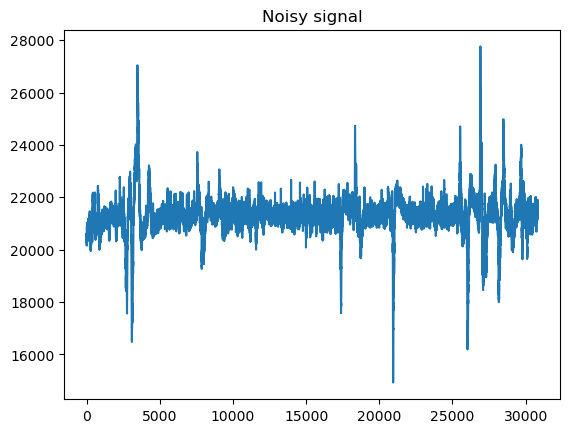

In [17]:
# Plot the noisy signal
plt.figure()
plt.plot(noisy_signal)
plt.title('Noisy signal')

In [18]:
# Define the Symlet4 wavelet function
wavelet = 'sym4'

# Decompose the noisy signal using the wavelet transform
coeffs = wavedec(noisy_signal, wavelet)

# Set a threshold for the coefficients
threshold = np.std(coeffs[-1]) * np.sqrt(2 * np.log(len(signal)))

# Apply the threshold to the detail coefficients
for i in range(1, len(coeffs)):
    coeffs[i] = pywt.threshold(coeffs[i], threshold)

# Reconstruct the denoised signal using the wavelet inverse transform
filtered_signal = waverec(coeffs, wavelet)
filtered_signal = filtered_signal[:len(signal)]

In [19]:
mse = mean_squared_error(noisy_signal, filtered_signal)
psnr = 20 * log10(max(noisy_signal)) - 10 * log10(mse)
snr = 10 * log10(np.sum(noisy_signal**2) / np.sum((noisy_signal - filtered_signal)**2))

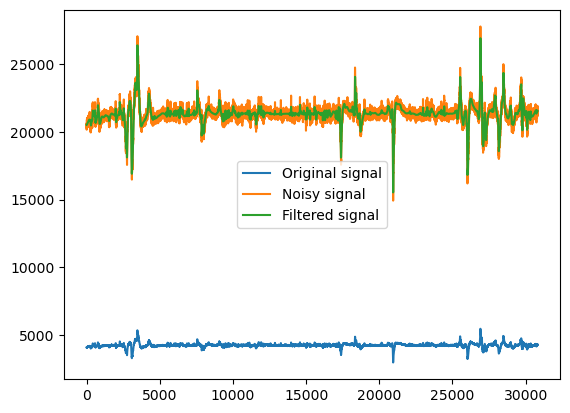

PSNR: 42.878047234003745
MSE: 39728.00678359621
SNR: 40.5897374526484


In [20]:
# Plot the original, noisy, and filtered signals
plt.plot(signal, label='Original signal')
plt.plot(noisy_signal, label='Noisy signal')
plt.plot(filtered_signal, label='Filtered signal')
plt.legend()
plt.show()

# Print the PSNR, MSE, and SNR values
print("PSNR:", psnr)
print("MSE:", mse)
print("SNR:", snr)

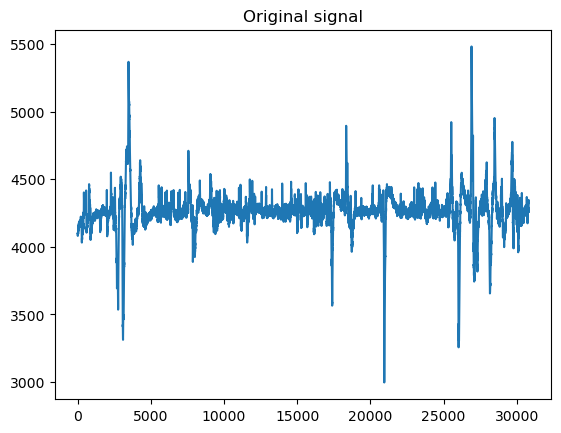

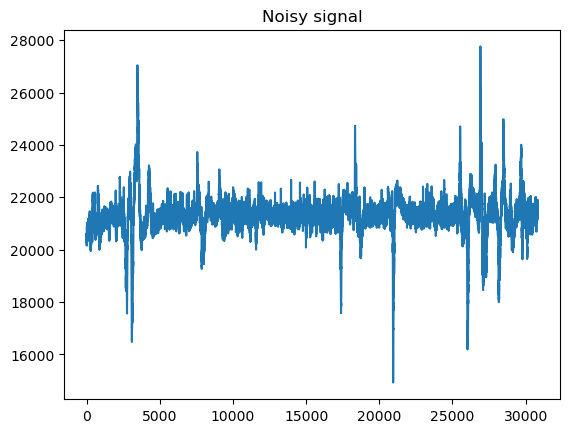

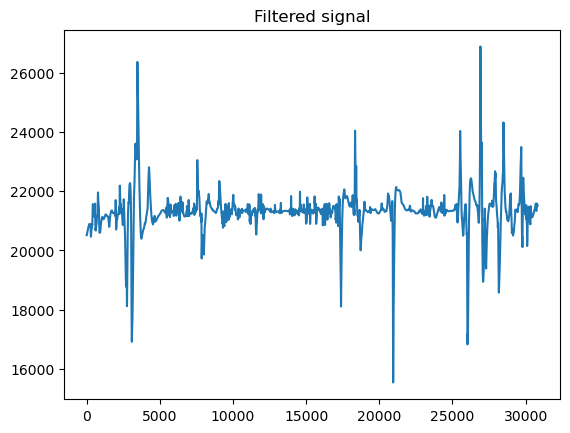

In [21]:
# Plot the original signal
plt.figure()
plt.plot(signal)
plt.title('Original signal')

# Plot the noisy signal
plt.figure()
plt.plot(noisy_signal)
plt.title('Noisy signal')

# Plot the filtered signal
plt.figure()
plt.plot(filtered_signal)
plt.title('Filtered signal')

# Show all the plots
plt.show()